<a href="https://colab.research.google.com/github/auramadera/auramadera/blob/main/AnalisisSupervisadoI_Sprint1%2C2%263.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisís Supervisado I

Sprint 1_Aura Madera

In [1]:
#Importar librerias 

# Tratamiento de datos
# libreria numerica
import numpy as np
# libreria pandas
import pandas as pd

# libreria para crear graficos 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plp
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import plotly.express as xp

#Preprocesado y modelado
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# cargar fichero de datos
file = '/content/Data/ASI_casoPractico.csv'
data = pd.read_csv(file, sep = ';')
data.head()

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,1,240,357,120,0,0,0,73,0.5,43,2.4,0,0,0,0,64,62,126,2,0,120,137,121,73,1,1
1,2,5,632,132,4,0,4,17,2.1,0,10.4,2,0,0,0,130,68,198,6,1,141,136,140,12,0,0
2,3,177,779,133,2,0,5,16,2.1,0,13.4,2,0,0,0,130,68,198,5,1,141,135,138,13,0,0
3,4,411,1192,134,2,0,6,16,2.4,0,23.0,2,0,0,0,117,53,170,11,0,137,134,137,13,1,0
4,5,533,1147,132,4,0,5,16,2.4,0,19.9,0,0,0,0,117,53,170,9,0,137,136,138,11,1,0


In [4]:
# Información del conjunto de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2126 non-null   int64  
 1   b         2126 non-null   int64  
 2   e         2126 non-null   int64  
 3   LBE       2126 non-null   int64  
 4   AC        2126 non-null   int64  
 5   FM        2126 non-null   int64  
 6   UC        2126 non-null   int64  
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  DL        2126 non-null   int64  
 12  DS        2126 non-null   int64  
 13  DP        2126 non-null   int64  
 14  DR        2126 non-null   int64  
 15  Width     2126 non-null   int64  
 16  Min       2126 non-null   int64  
 17  Max       2126 non-null   int64  
 18  Nmax      2126 non-null   int64  
 19  Nzeros    2126 non-null   int64  
 20  Mode      2126 non-null   int6

In [5]:
# numero de valores unicos para cada variable
data.agg(['nunique'])

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
nunique,2126,979,1064,48,22,96,19,75,57,87,249,15,2,5,1,154,109,86,18,9,88,103,95,133,3,2


In [6]:
# eliminar columnas no necesarias
data = data.drop (["ID", "b", "e", "DR"], axis = 1)
data.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,0,64,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,0,130,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,0,130,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,0,117,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,0,117,53,170,9,0,137,136,138,11,1,0


Analisis Descriptivo

In [7]:
#valores nulos
data.isnull().sum()

LBE         0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
Target      0
dtype: int64

In [8]:
# ¿Cuál es la proporción de estados fetales normal? ¿y anormales?
a, b = data["Target"].value_counts()
print("Número de estados normales: " + str(a))
print("Número de estados anormales: " + str(b))

Número de estados normales: 1655
Número de estados anormales: 471


0    1655
1     471
Name: Target, dtype: int64


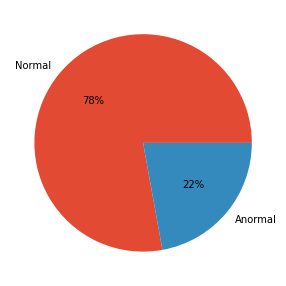

In [9]:
# Distribución de frecuencias del Target
a, b = data['Target'].value_counts()
plt.figure(figsize = (13,5))
plt.subplot(121)
plt.pie([a, b], labels=["Normal", "Anormal"], autopct="%1.0f%%")
print(data["Target"].value_counts())

In [10]:
# Obtenga las medidas de centralización, localización y dispersión para las variables:  
# FM, ALTV y Median.
data[["FM", "ALTV","Median"]].describe().T

,count,mean,std,min,25%,50%,75%,max
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
Median,2126.0,138.090310,14.466589,77.0,129.0,139.0,148.0,186.0


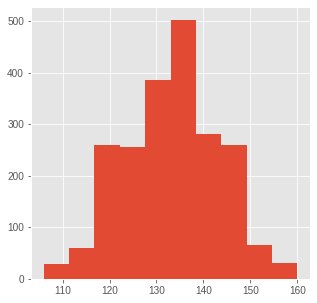

In [11]:
# Histograma LBE
fig, ax = plp.subplots(1,1,figsize=(5,5))
plt.style.use("seaborn")
data.LBE.hist(ax=ax);



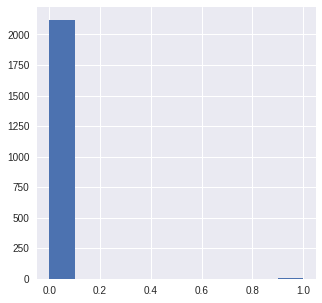

In [12]:
# Histograma DS
fig, ax = plp.subplots(1,1,figsize=(5,5))
plt.style.use("seaborn")
data.DS.hist(ax=ax);

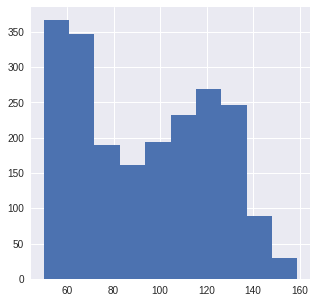

In [13]:
# Histograma Min
fig, ax = plt.subplots(1,1,figsize=(5,5))
plt.style.use("seaborn")
data.Min.hist(ax=ax);

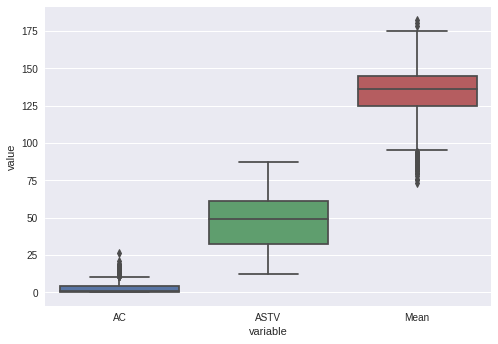

In [15]:
# Obtenga un gráfico box -plot para las variables: AC, ASTV y Mean. 
sns.boxplot(x="variable", y="value", data=pd.melt(data[["AC", "ASTV", "Mean"]]))

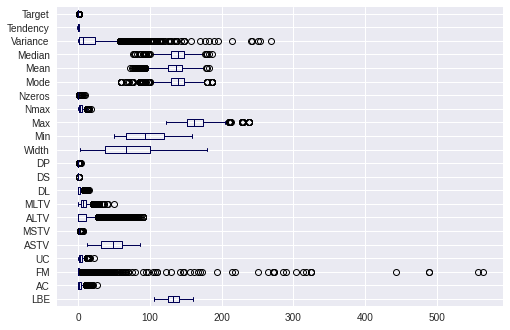

In [14]:
#box plot

data_box_plot = data.boxplot(vert=False, color = "#000054")

Sprint 2

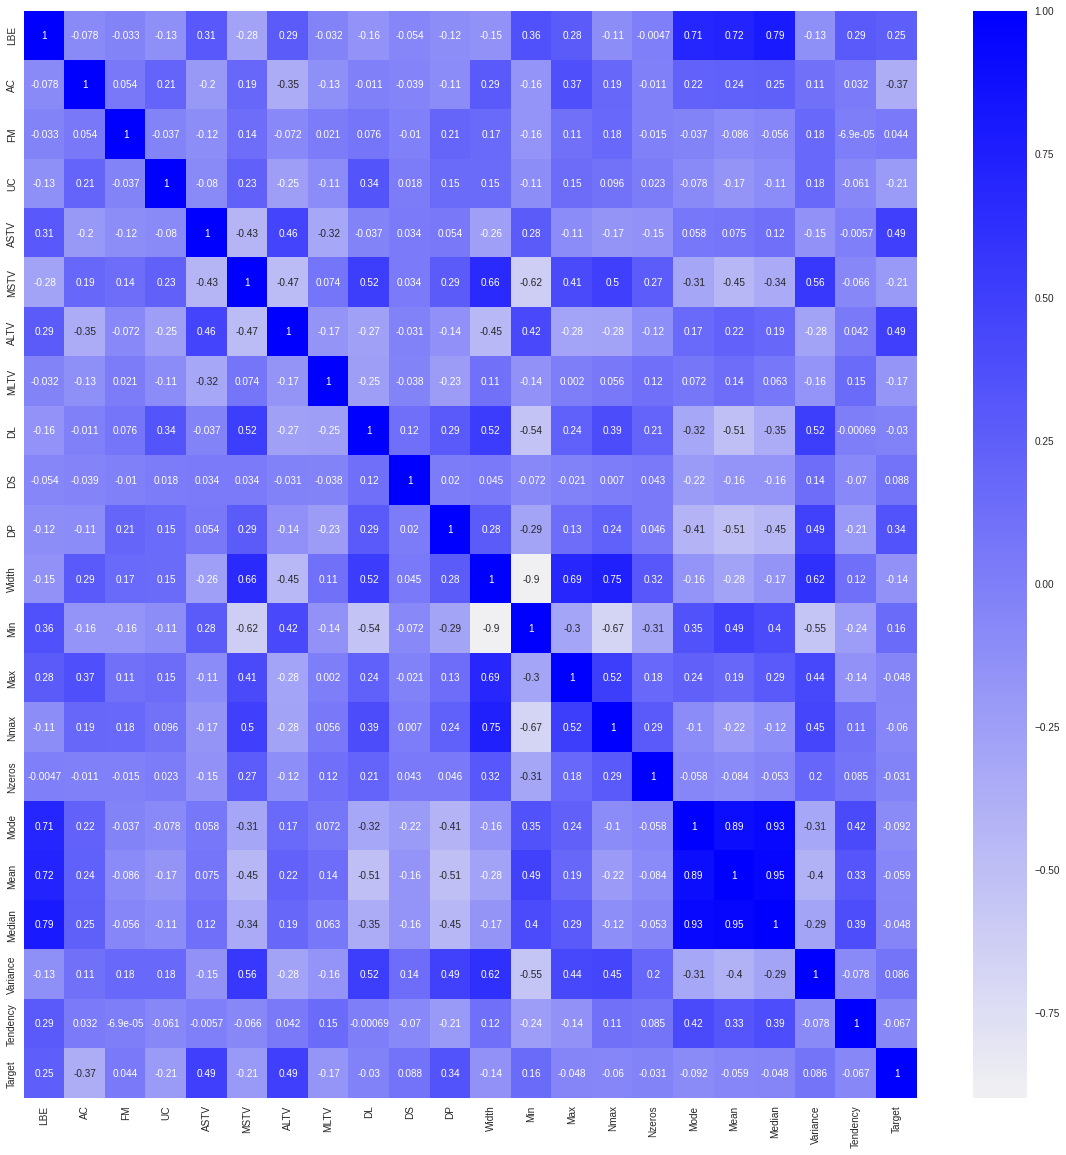

In [16]:
# Matriz de correlaciones
plt.figure(figsize=(20,20))
corr = data.corr()
cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)

Las 3 variables con mayor correlación:

1- LBE

2- ASTV

3- Width

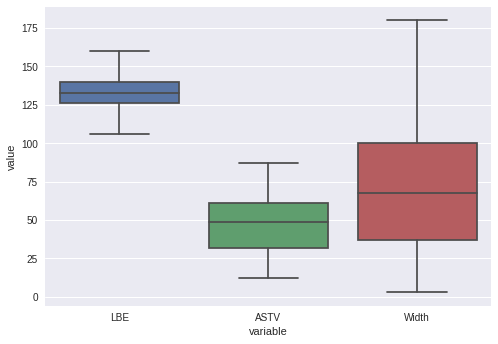

In [17]:
# Obtenga un gráfico box -plot para las variables: AC, ASTV y Mean. 
sns.boxplot(x="variable", y="value", data=pd.melt(data[["LBE", "ASTV", "Width"]]))

Text(0.5, 1.0, 'Baseline Fetal Heart Rate (FHR) for each status')

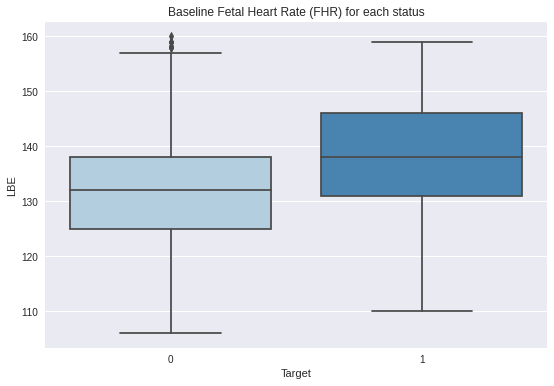

In [18]:
# Relación Univariante del target con las variables explicativas
plt.figure(figsize = (9,6))
sns.boxplot(x = 'Target', y= 'LBE', data= data, palette= "Blues")
plt.title('Baseline Fetal Heart Rate (FHR) for each status')

Text(0.5, 1.0, 'Baseline Fetal Heart Rate (FHR) for each status')

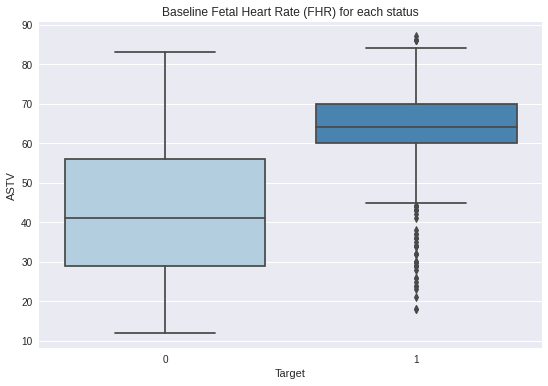

In [19]:
plt.figure(figsize = (9,6))
sns.boxplot(x = 'Target', y= 'ASTV', data= data, palette= "Blues")
plt.title('Baseline Fetal Heart Rate (FHR) for each status')

Text(0.5, 1.0, 'Baseline Fetal Heart Rate (FHR) for each status')

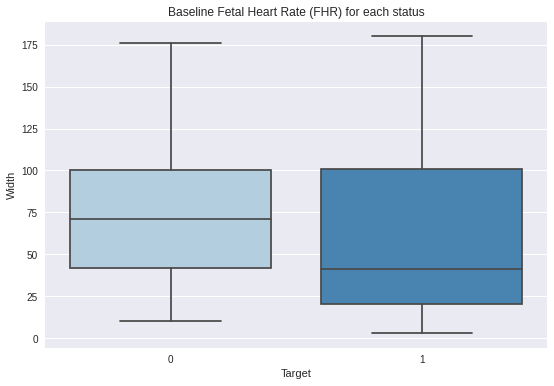

In [20]:
plt.figure(figsize = (9,6))
sns.boxplot(x = 'Target', y= 'Width', data= data, palette= "Blues")
plt.title('Baseline Fetal Heart Rate (FHR) for each status')

In [47]:
# Muestreo

#Entrenamiento y TEST
from sklearn.model_selection import train_test_split
x = data.loc[:, data.columns != "Target"]
y = data.loc[:, data.columns == "Target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=0)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 1716 to 1653
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBE       1275 non-null   int64  
 1   AC        1275 non-null   int64  
 2   FM        1275 non-null   int64  
 3   UC        1275 non-null   int64  
 4   ASTV      1275 non-null   int64  
 5   MSTV      1275 non-null   float64
 6   ALTV      1275 non-null   int64  
 7   MLTV      1275 non-null   float64
 8   DL        1275 non-null   int64  
 9   DS        1275 non-null   int64  
 10  DP        1275 non-null   int64  
 11  Width     1275 non-null   int64  
 12  Min       1275 non-null   int64  
 13  Max       1275 non-null   int64  
 14  Nmax      1275 non-null   int64  
 15  Nzeros    1275 non-null   int64  
 16  Mode      1275 non-null   int64  
 17  Mean      1275 non-null   int64  
 18  Median    1275 non-null   int64  
 19  Variance  1275 non-null   int64  
 20  Tendency  1275 non-null   i

In [22]:
print(x)

      LBE  AC  FM  UC  ASTV  ...  Mode  Mean  Median  Variance  Tendency
0     120   0   0   0    73  ...   120   137     121        73         1
1     132   4   0   4    17  ...   141   136     140        12         0
2     133   2   0   5    16  ...   141   135     138        13         0
3     134   2   0   6    16  ...   137   134     137        13         1
4     132   4   0   5    16  ...   137   136     138        11         1
...   ...  ..  ..  ..   ...  ...   ...   ...     ...       ...       ...
2121  140   0   0   6    79  ...   153   150     152         2         0
2122  140   1   0   9    78  ...   152   148     151         3         1
2123  140   1   0   7    79  ...   153   148     152         4         1
2124  140   1   0   9    78  ...   152   147     151         4         1
2125  142   1   1   5    74  ...   145   143     145         1         0

[2126 rows x 21 columns]


In [23]:
print(y)

      Target
0          1
1          0
2          0
3          0
4          0
...      ...
2121       1
2122       1
2123       1
2124       1
2125       0

[2126 rows x 1 columns]


Entrenamiento

In [29]:
# Modelización
from sklearn.naive_bayes import  GaussianNB
gnb = GaussianNB()

modelNB = gnb.fit(x_train, y_train.values.ravel())
y_pred_train = modelNB.predict_proba(x_train)
y_pred_test = modelNB.predict_proba(x_test)


#presentamos nuestros resultados
print('y_pred_train= ' + str (y_pred_train))
print('y_pred_test = ' + str (y_pred_test))

y_pred_train= [[1.00000000e+00 9.87834636e-50]
 [9.99999821e-01 1.79307698e-07]
 [9.99864975e-01 1.35024570e-04]
 ...
 [9.99998899e-01 1.10055094e-06]
 [1.00000000e+00 3.99300304e-10]
 [8.62950885e-01 1.37049115e-01]]
y_pred_test = [[9.99921734e-01 7.82655452e-05]
 [1.00000000e+00 1.65872613e-40]
 [9.65164132e-01 3.48358683e-02]
 ...
 [9.99950864e-01 4.91362668e-05]
 [9.99999993e-01 6.64857974e-09]
 [1.00000000e+00 2.55509714e-19]]


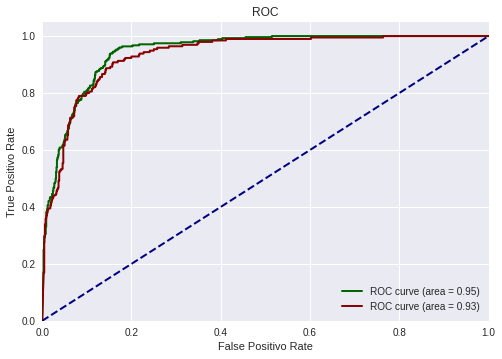

In [48]:
# Validación
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# Curva Roc y Auc para trainig
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# Curva Roc y Auc para test
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

#Gráfica
plp.figure()
lw = 2

plp.plot(fpr_train,tpr_train,color="darkgreen",lw=lw, label="ROC curve (area = %0.2f)" % roc_auc_train)
plp.plot(fpr_test,tpr_test, color="darkred",lw=lw, label="ROC curve (area = %0.2f)" % roc_auc_test)

plp.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plp.xlim([0.0, 1.0])
plp.ylim([0.0, 1.05])
plp.xlabel("False Positivo Rate")
plp.ylabel("True Positivo Rate")
plp.title("ROC")
plp.legend(loc="lower right")
plp.show()



Sprint 3

SVC

In [49]:
# solo tomamos dos variable a modo de ejemplo: Mean y Variance
vars = ["ASTV", "Mean"]
x = data[vars]
y = data.loc[:, data.columns == "Target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.50, random_state = 0)

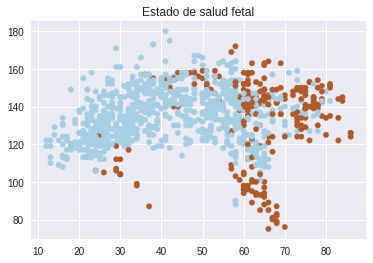

In [50]:
fig, ax = plt.subplots(figsize=(6,4))
plt.scatter(x_train.ASTV, x_train.Mean, c = y_train.Target, s=30, cmap=plt.cm.Paired)
ax.set_title("Estado de salud fetal");

In [51]:
# Creación del Modelo SVM Lineal

modelo = SVC(C = 10, kernel = 'linear', random_state=123)
modelo.fit(x_train, y_train)

SVC(C=10, kernel='linear', random_state=123)

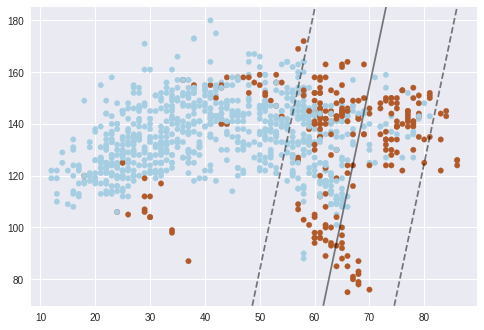

In [52]:
# Creación del modelo SVM lineal

plt.scatter(x_train.ASTV, x_train.Mean, c = y_train.Target, s=30, cmap=plt.cm.Paired)

#Funcion de decision
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#Grid para evaluar el modelo
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = modelo.decision_function(xy).reshape(XX.shape)

#Plano de decision
ax.contour(
    XX, YY, Z, colors="k", levels=[-1,0,1], alpha=0.5, linestyles= ["--", "-", "--"]
)
# plot support vectors
plt.show()

In [53]:
# Predicciones test

predicciones_train = modelo.predict(x_train)
predicciones_test = modelo.predict(x_test)

In [54]:
# Accuracy de test del modelo

accuracy = accuracy_score(y_true = y_train, y_pred = predicciones_train, normalize = True)
print(f"El accuracy de training es: {100*accuracy}%")

accuracy = accuracy_score(y_true = y_test, y_pred = predicciones_test, normalize = True)
print(f"El accuracy de test es: {100*accuracy}%")

#Matriz de confusion de las predicciones de test

confusion_matrix = pd.crosstab(
    y_test.Target.ravel(),
    predicciones_test,
    rownames=['Real'],
    colnames=['Predicción']
)
print(confusion_matrix)


El accuracy de training es: 83.34901222953904%
El accuracy de test es: 83.16086547507055%
Predicción    0   1
Real               
0           799  30
1           149  85


SVM

In [55]:
#Coger dos variables de ejemplo: Mean y Variance

x = data.loc[:, data.columns != "Target"]
y = data.loc[:, data.columns == "Target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=0)



In [56]:
# SVM Lineal

svmLineal = svm.SVC(C = 1 #Regularización
                    ,kernel='linear'#Kernel
                    #,degree = 1 #Poly, Grado del Polinomio
                    ,probability = True)

#Ajuste del modelo
svmLineal.fit(x_train, y_train)

#Validacion con el conjunto de test
y_proba_train_svm = svmLineal.predict_proba(x_train)
y_proba_test_svm = svmLineal.predict_proba(x_test)



In [57]:
print(y_proba_train_svm)

[[9.99407030e-01 5.92970240e-04]
 [8.59344968e-01 1.40655032e-01]
 [5.64409944e-01 4.35590056e-01]
 ...
 [8.19211647e-01 1.80788353e-01]
 [9.99488412e-01 5.11588156e-04]
 [9.58358271e-01 4.16417293e-02]]


In [58]:
#Entrenamiento

#Train
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_proba_train_svm[:, 1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

#Test
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_proba_test_svm[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)


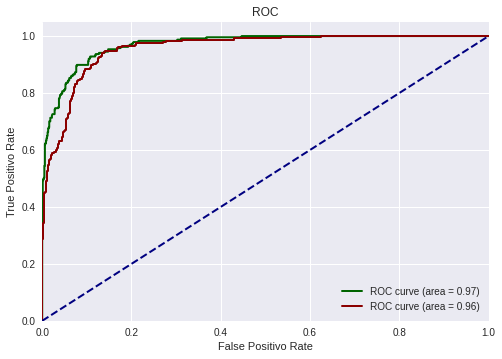

In [60]:
# Curva ROC y AUC

plp.figure()
lw = 2

plp.plot(fpr_train_svm,tpr_train_svm,color="darkgreen",lw=lw, label="ROC curve (area = %0.2f)" % roc_auc_train_svm)
plp.plot(fpr_test_svm,tpr_test_svm, color="darkred",lw=lw, label="ROC curve (area = %0.2f)" % roc_auc_test_svm)

plp.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plp.xlim([0.0, 1.0])
plp.ylim([0.0, 1.05])
plp.xlabel("False Positivo Rate")
plp.ylabel("True Positivo Rate")
plp.title("ROC")
plp.legend(loc="lower right")
plp.show()

In [67]:
from seaborn.axisgrid import Grid
from sklearn.model_selection import GridSearchCV

param_grid = [
              {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [0.1,1,10]},
              {"kernel": ["linear"], "C": [0.1,1,10]},
              {"kernel": ["poly"], "C": [0.1,1,10], "degree": [2,3]},
              
]

grid = GridSearchCV(
    estimator = SVC(),
    param_grid = param_grid,
    scoring = 'roc_auc', #roc_auc, accuracy
    n_jobs = -1,
    cv = 3,
    verbose = 0,
    return_train_score = True
)

grid.fit(X= x_train, y = y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10], 'degree': [2, 3],
                          'kernel': ['poly']}],
             return_train_score=True, scoring='roc_auc')

In [68]:
# Resultados del grid

resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
      .drop(columns = 'params')\
      .sort_values ('mean_test_score', ascending = False)\
      .head(10)

,param_C,param_gamma,param_kernel,param_degree,mean_test_score,std_test_score,mean_train_score,std_train_score
6,0.1,NaN,linear,NaN,0.963630,0.010899,0.970071,0.006553
7,1,NaN,linear,NaN,0.963217,0.011037,0.972587,0.005491
8,10,NaN,linear,NaN,0.963156,0.011326,0.973054,0.004852
5,10,0.0001,rbf,NaN,0.960784,0.005379,0.981283,0.001894
2,1,0.001,rbf,NaN,0.948559,0.002482,0.988743,0.003375
3,1,0.0001,rbf,NaN,0.948488,0.003802,0.962389,0.001818
4,10,0.001,rbf,NaN,0.947906,0.007447,0.997538,0.001651
14,10,NaN,poly,3,0.945553,0.007346,0.956945,0.003023
13,10,NaN,poly,2,0.938226,0.007961,0.948988,0.002895
12,1,NaN,poly,3,0.930611,0.007825,0.937005,0.003620


In [69]:
#Mostrar best parameter after tuning
print (grid.best_params_)

#Mostrar hor our model looks after hyper-parameter tuning
print (grid.best_estimator_)

{'C': 0.1, 'kernel': 'linear'}
SVC(C=0.1, kernel='linear')
